In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
file_path = 'Mendelian.train.tsv'
training_dataframe = pd.read_csv(file_path, sep='\t').drop(columns=["CpGobsExp", "CpGperCpG", "dbVARCount", "mamPhyloP46way"])

In [4]:
file_path = 'Mendelian.test.tsv'
testing_dataframe=pd.read_csv(file_path, sep='\t').drop(columns=["CpGobsExp", "CpGperCpG", "dbVARCount", "mamPhyloP46way"])

In [5]:
from sklearn.preprocessing import StandardScaler
scaled_training_dataframe = StandardScaler().fit_transform(training_dataframe)
scaled_testing_dataframe = StandardScaler().fit_transform(testing_dataframe)
scaled_mixed_dataframe = StandardScaler().fit_transform(testing_dataframe.append(training_dataframe))

In [6]:
TRAINING_DATA = 981388
TESTING_DATA = 19018

In [7]:
TRAINING_POSITIVES_NUMBER = 356
TESTING_POSITIVES_NUMBER = 40

In [8]:
training_labels = np.full((TRAINING_DATA),4)
training_labels[:TRAINING_POSITIVES_NUMBER] = np.full((TRAINING_POSITIVES_NUMBER), 3)

testing_labels = np.full((TESTING_DATA), 2)
testing_labels[:TESTING_POSITIVES_NUMBER] = np.full((TESTING_POSITIVES_NUMBER), 1)

mixed_labels = np.zeros((TESTING_DATA+TRAINING_DATA))
mixed_labels[:TESTING_POSITIVES_NUMBER] = np.ones((TESTING_POSITIVES_NUMBER))
mixed_labels[TESTING_POSITIVES_NUMBER:TESTING_DATA] = np.full((TESTING_DATA-TESTING_POSITIVES_NUMBER), 2)
mixed_labels[TESTING_DATA:TESTING_DATA+TRAINING_POSITIVES_NUMBER] = np.full((TRAINING_POSITIVES_NUMBER), 3)
mixed_labels[TESTING_DATA+TRAINING_POSITIVES_NUMBER:] = np.full((TRAINING_DATA-TRAINING_POSITIVES_NUMBER), 4)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [10]:
training_clustered = pd.concat(
    [
        pd.DataFrame(
            data=pca.fit_transform(scaled_training_dataframe),
            columns=['a', 'b']),
        pd.DataFrame(training_labels, columns=("target", ))
    ],
    axis=1)

In [11]:
testing_clustered = pd.concat(
    [
        pd.DataFrame(
            data=pca.fit_transform(scaled_testing_dataframe),
            columns=['a', 'b']),
        pd.DataFrame(testing_labels, columns=("target", ))
    ],
    axis=1)

In [12]:
mixed_clustered = pd.concat(
    [
        pd.DataFrame(
            data=pca.fit_transform(scaled_mixed_dataframe),
            columns=['a', 'b']),
        pd.DataFrame(mixed_labels, columns=("target", ))
    ],
    axis=1)

In [21]:
def plot_cluster(cluster, title):
    plt.figure(figsize=(15, 15))
    plt.title('%s dataset 2 component PCA' % title, fontsize=20)
    colors = ["red", "green", "blue", "orange", "purple"]
    targets = [0, 4, 2, 3, 1]
    for target, color in zip(targets, colors):
        indicesToKeep = cluster['target'] == target
        plt.scatter(
            cluster.loc[indicesToKeep, 'a'],
            cluster.loc[indicesToKeep, 'b'],
            alpha=0.7,
            c = color,
            s=50)
    plt.grid()
    plt.savefig("pca/%s"%title.lower())
    plt.show()

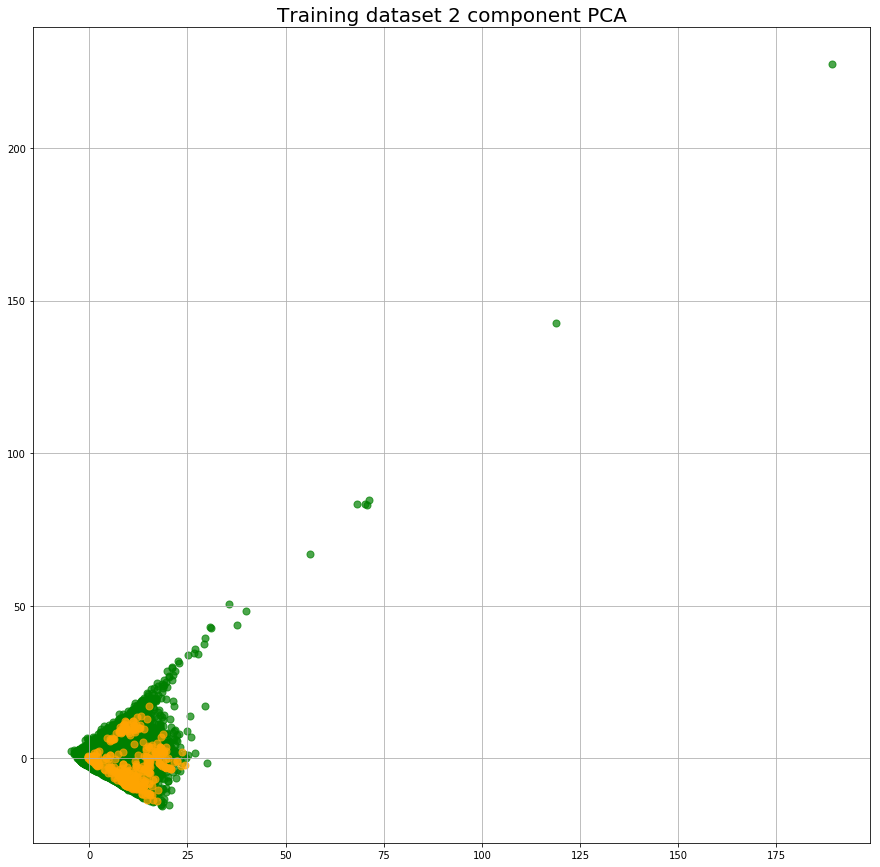

In [22]:
plot_cluster(training_clustered, "Training")

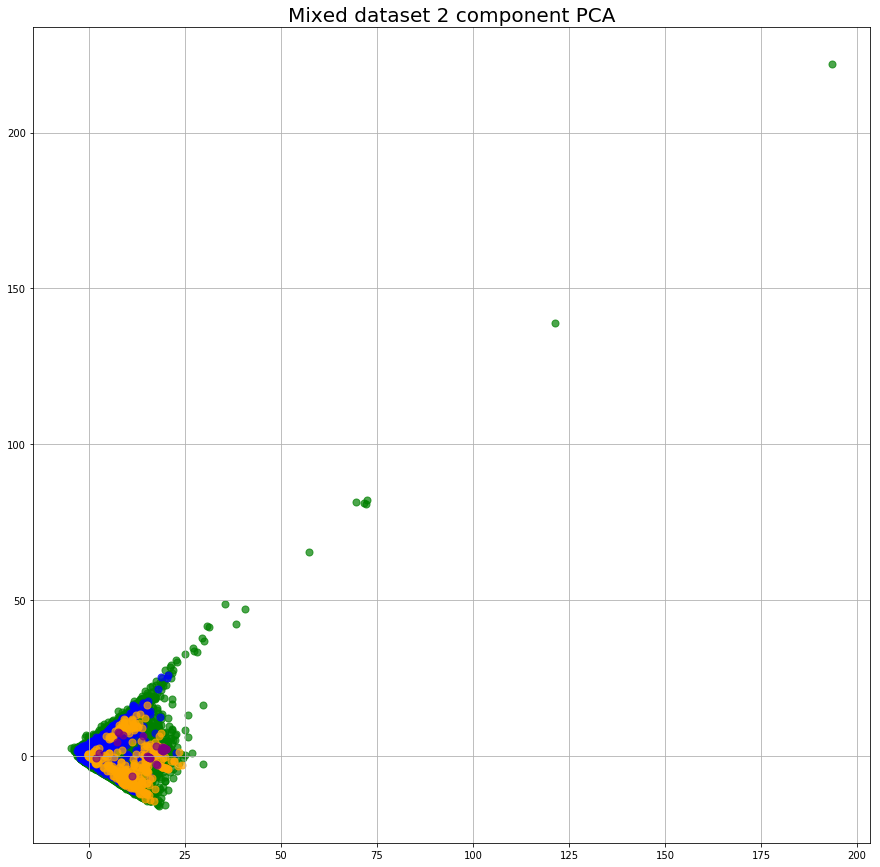

In [23]:
plot_cluster(mixed_clustered, "Mixed")

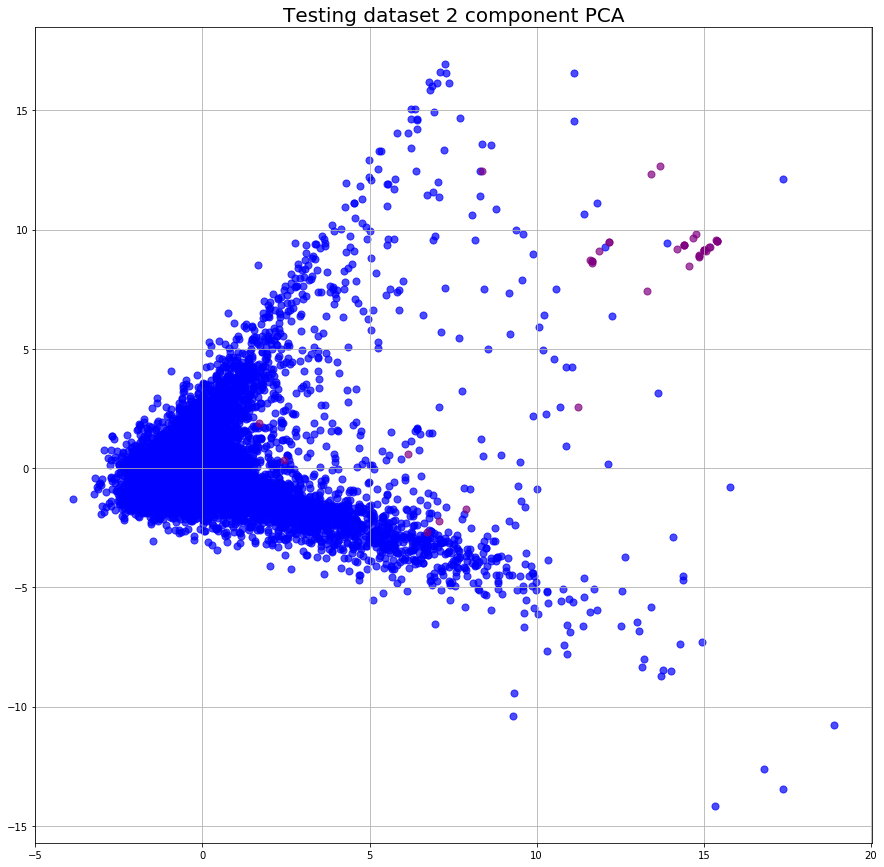

In [24]:
plot_cluster(testing_clustered, "Testing")